# Mockup Using deep learning neural network model

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.preprocessing import Normalizer

In [2]:
# Loading the files 
file_path = "Resources/Merged.csv"

In [3]:
# Read the data file and store it in a Pandas DataFrame.
Cardiovas_df = pd.read_csv(file_path)
Cardiovas_df.head()

,id,age,gender,height,weight,BMI,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,0,50.0,0,5.51,136.7,23.0,110.0,80.0,0.0,0.0,0,0,1,0
1,1,55.0,1,5.12,187.4,46.0,140.0,90.0,2.0,0.0,0,0,1,1
2,2,52.0,1,5.41,141.1,25.0,130.0,70.0,2.0,0.0,0,0,0,1
3,3,48.0,0,5.54,180.8,40.0,0.0,0.0,0.0,0.0,0,0,1,1
4,4,48.0,1,5.12,123.5,20.0,100.0,60.0,0.0,0.0,0,0,0,0


In [4]:
#  Removing the sample ID for ML
clean_df = Cardiovas_df
clean_df= Cardiovas_df.drop(['id'], 1)

In [5]:
#  Removing the sample BMI for ML
clean_df = Cardiovas_df
clean_df = Cardiovas_df.drop(['BMI'],1)
clean_df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
0,0,50.0,0,5.51,136.7,110.0,80.0,0.0,0.0,0,0,1,0
1,1,55.0,1,5.12,187.4,140.0,90.0,2.0,0.0,0,0,1,1
2,2,52.0,1,5.41,141.1,130.0,70.0,2.0,0.0,0,0,0,1
3,3,48.0,0,5.54,180.8,0.0,0.0,0.0,0.0,0,0,1,1
4,4,48.0,1,5.12,123.5,100.0,60.0,0.0,0.0,0,0,0,0
5,8,60.0,1,4.95,147.7,120.0,80.0,1.0,1.0,0,0,0,0
6,9,61.0,1,5.15,205.0,130.0,80.0,2.0,0.0,0,0,1,0
7,12,62.0,0,5.84,209.4,130.0,90.0,2.0,2.0,0,0,1,1
8,13,48.0,1,5.18,156.5,110.0,70.0,0.0,0.0,0,0,1,0
9,14,54.0,1,5.38,149.9,110.0,60.0,0.0,0.0,0,0,0,0


In [6]:
# feature data for X:
# age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active
X = clean_df.drop(['cardio'], 1).values

In [7]:
# feature data for y:
# "does a person have a cardiovascular disease y/n"
y = clean_df['cardio']

In [8]:
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

In [9]:
# training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# standard scaler instance
X_scaler = StandardScaler()

In [39]:
# neural net
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 13
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3

nn_model = tf.keras.models.Sequential()

In [40]:
# first layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation="ReLU"))

In [41]:
# second layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

In [42]:
# Third layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

In [43]:
# output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [44]:
# check the structure
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 13)                169       
_________________________________________________________________
dense_12 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 4         
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [45]:
# compile model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train model
fit_model = nn_model.fit(X_train_scaled, y_train,epochs=77)

Epoch 1/77
1641/1641 [==============================] - 1s 471us/step - loss: 0.6283 - accuracy: 0.6537
Epoch 2/77
1641/1641 [==============================] - 1s 465us/step - loss: 0.5569 - accuracy: 0.7252
Epoch 3/77
1641/1641 [==============================] - 1s 466us/step - loss: 0.5509 - accuracy: 0.7302
Epoch 4/77
1641/1641 [==============================] - 1s 466us/step - loss: 0.5495 - accuracy: 0.7305
Epoch 5/77
1641/1641 [==============================] - 1s 465us/step - loss: 0.5487 - accuracy: 0.7307
Epoch 6/77
1641/1641 [==============================] - 1s 466us/step - loss: 0.5484 - accuracy: 0.7317
Epoch 7/77
1641/1641 [==============================] - 1s 474us/step - loss: 0.5479 - accuracy: 0.7320
Epoch 8/77
1641/1641 [==============================] - 1s 468us/step - loss: 0.5476 - accuracy: 0.7322
Epoch 9/77
1641/1641 [==============================] - 1s 466us/step - loss: 0.5472 - accuracy: 0.7319
Epoch 10/77
1641/1641 [==============================] - 1s 467u

In [46]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

547/547 - 0s - loss: 0.5412 - accuracy: 0.7402
Loss: 0.5411657094955444, Accuracy: 0.7402285933494568


<AxesSubplot:>

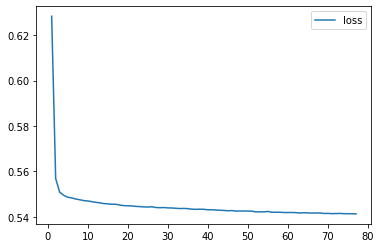

In [48]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

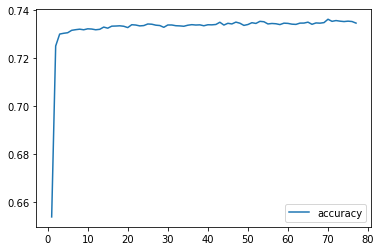

In [49]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [47]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf7"